In [19]:
%load_ext autoreload
%autoreload 2
    
import os 
from pathlib import Path 
from glob import glob
import matplotlib.pyplot as plt 
%matplotlib inline 

import pandas as pd 
import numpy as np 

import joblib

import seaborn as sns

from colorml.featurize import get_color_descriptors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
CHEMICAL_FEATURES = [
    'mc_CRY-chi-0-all',
    'mc_CRY-chi-1-all',
    'mc_CRY-chi-2-all',
    'mc_CRY-chi-3-all',
    'mc_CRY-Z-0-all',
    'mc_CRY-Z-1-all',
    'mc_CRY-Z-2-all',
    'mc_CRY-Z-3-all',
    'mc_CRY-I-1-all',
    'mc_CRY-I-2-all',
    'mc_CRY-I-3-all',
    'mc_CRY-T-0-all',
    'mc_CRY-T-1-all',
    'mc_CRY-T-2-all',
    'mc_CRY-T-3-all',
    'mc_CRY-S-0-all',
    'mc_CRY-S-1-all',
    'mc_CRY-S-2-all',
    'mc_CRY-S-3-all',
    'D_mc_CRY-chi-1-all',
    'D_mc_CRY-chi-2-all',
    'D_mc_CRY-chi-3-all',
    'D_mc_CRY-Z-1-all',
    'D_mc_CRY-Z-2-all',
    'D_mc_CRY-Z-3-all',
    'D_mc_CRY-T-1-all',
    'D_mc_CRY-T-2-all',
    'D_mc_CRY-T-3-all',
    'D_mc_CRY-S-1-all',
    'D_mc_CRY-S-2-all',
    'D_mc_CRY-S-3-all',
    'func-chi-0-all',
    'func-chi-1-all',
    'func-chi-2-all',
    'func-chi-3-all',
    'func-Z-0-all',
    'func-Z-1-all',
    'func-Z-2-all',
    'func-Z-3-all',
    'func-I-1-all',
    'func-I-2-all',
    'func-I-3-all',
    'func-T-0-all',
    'func-T-1-all',
    'func-T-2-all',
    'func-T-3-all',
    'func-S-0-all',
    'func-S-1-all',
    'func-S-2-all',
    'func-S-3-all',
    'func-alpha-0-all',
    'func-alpha-1-all',
    'func-alpha-2-all',
    'func-alpha-3-all',
    'D_func-chi-1-all',
    'D_func-chi-2-all',
    'D_func-chi-3-all',
    'D_func-Z-1-all',
    'D_func-Z-2-all',
    'D_func-Z-3-all',
    'D_func-T-1-all',
    'D_func-T-2-all',
    'D_func-T-3-all',
    'D_func-S-2-all',
    'D_func-S-3-all',
    'D_func-alpha-1-all',
    'D_func-alpha-2-all',
    'D_func-alpha-3-all',
    'f-lig-chi-0',
    'f-lig-chi-1',
    'f-lig-chi-2',
    'f-lig-chi-3',
    'f-lig-Z-0',
    'f-lig-Z-1',
    'f-lig-Z-2',
    'f-lig-Z-3',
    'f-lig-I-0',
    'f-lig-I-1',
    'f-lig-I-2',
    'f-lig-I-3',
    'f-lig-T-0',
    'f-lig-T-1',
    'f-lig-T-2',
    'f-lig-T-3',
    'f-lig-S-0',
    'f-lig-S-1',
    'f-lig-S-2',
    'f-lig-S-3',
    'lc-chi-0-all',
    'lc-chi-1-all',
    'lc-chi-2-all',
    'lc-chi-3-all',
    'lc-Z-0-all',
    'lc-Z-1-all',
    'lc-Z-2-all',
    'lc-Z-3-all',
    'lc-I-2-all',
    'lc-I-3-all',
    'lc-T-0-all',
    'lc-T-1-all',
    'lc-T-2-all',
    'lc-T-3-all',
    'lc-S-3-all',
    'lc-alpha-0-all',
    'lc-alpha-1-all',
    'lc-alpha-2-all',
    'lc-alpha-3-all',
    'D_lc-chi-2-all',
    'D_lc-chi-3-all',
    'D_lc-Z-1-all',
    'D_lc-Z-2-all',
    'D_lc-Z-3-all',
    'D_lc-T-1-all',
    'D_lc-T-2-all',
    'D_lc-T-3-all',
    'D_lc-alpha-1-all',
    'D_lc-alpha-2-all',
    'D_lc-alpha-3-all',
    'tertiary_amide_sum',
    'ester_sum',
    'carbonyl_sum',
    'logP_sum',
    'MR_sum',
    'aromatic_rings_sum',
    'dbonds_sum',
    'abonds_sum',
    'tertiary_amide_mean',
    'ester_mean',
    'carbonyl_mean',
    'logP_mean',
    'MR_mean',
    'aromatic_rings_mean',
    'dbonds_mean',
    'abonds_mean',
    'sum-func-chi-0-all',
    'sum-func-chi-1-all',
    'sum-func-chi-2-all',
    'sum-func-chi-3-all',
    'sum-func-Z-0-all',
    'sum-func-Z-1-all',
    'sum-func-Z-2-all',
    'sum-func-Z-3-all',
    'sum-func-I-0-all',
    'sum-func-I-1-all',
    'sum-func-I-2-all',
    'sum-func-I-3-all',
    'sum-func-T-0-all',
    'sum-func-T-1-all',
    'sum-func-T-2-all',
    'sum-func-T-3-all',
    'sum-func-S-0-all',
    'sum-func-S-1-all',
    'sum-func-S-2-all',
    'sum-func-S-3-all',
    'sum-func-alpha-0-all',
    'sum-func-alpha-1-all',
    'sum-func-alpha-2-all',
    'sum-func-alpha-3-all',
    'sum-D_func-chi-1-all',
    'sum-D_func-chi-2-all',
    'sum-D_func-chi-3-all',
    'sum-D_func-Z-1-all',
    'sum-D_func-Z-2-all',
    'sum-D_func-Z-3-all',
    'sum-D_func-T-1-all',
    'sum-D_func-T-2-all',
    'sum-D_func-T-3-all',
    'sum-D_func-S-1-all',
    'sum-D_func-S-2-all',
    'sum-D_func-S-3-all',
    'sum-D_func-alpha-1-all',
    'sum-D_func-alpha-2-all',
    'sum-D_func-alpha-3-all',
    'sum-f-lig-chi-0',
    'sum-f-lig-chi-1',
    'sum-f-lig-chi-2',
    'sum-f-lig-chi-3',
    'sum-f-lig-Z-0',
    'sum-f-lig-Z-1',
    'sum-f-lig-Z-2',
    'sum-f-lig-Z-3',
    'sum-f-lig-I-0',
    'sum-f-lig-I-1',
    'sum-f-lig-I-2',
    'sum-f-lig-I-3',
    'sum-f-lig-T-0',
    'sum-f-lig-T-1',
    'sum-f-lig-T-2',
    'sum-f-lig-T-3',
    'sum-f-lig-S-0',
    'sum-f-lig-S-1',
    'sum-f-lig-S-2',
    'sum-f-lig-S-3',
    'sum-lc-chi-0-all',
    'sum-lc-chi-1-all',
    'sum-lc-chi-2-all',
    'sum-lc-chi-3-all',
    'sum-lc-Z-0-all',
    'sum-lc-Z-1-all',
    'sum-lc-Z-2-all',
    'sum-lc-Z-3-all',
    'sum-lc-I-0-all',
    'sum-lc-I-1-all',
    'sum-lc-I-2-all',
    'sum-lc-I-3-all',
    'sum-lc-T-0-all',
    'sum-lc-T-1-all',
    'sum-lc-T-2-all',
    'sum-lc-T-3-all',
    'sum-lc-S-0-all',
    'sum-lc-S-1-all',
    'sum-lc-S-2-all',
    'sum-lc-S-3-all',
    'sum-lc-alpha-0-all',
    'sum-lc-alpha-1-all',
    'sum-lc-alpha-2-all',
    'sum-lc-alpha-3-all',
    'sum-D_lc-chi-1-all',
    'sum-D_lc-chi-2-all',
    'sum-D_lc-chi-3-all',
    'sum-D_lc-Z-1-all',
    'sum-D_lc-Z-2-all',
    'sum-D_lc-Z-3-all',
    'sum-D_lc-T-1-all',
    'sum-D_lc-T-2-all',
    'sum-D_lc-T-3-all',
    'sum-D_lc-S-1-all',
    'sum-D_lc-S-2-all',
    'sum-D_lc-S-3-all',
    'sum-D_lc-alpha-1-all',
    'sum-D_lc-alpha-2-all',
    'sum-D_lc-alpha-3-all',
    'sum-mc_CRY-chi-0-all',
    'sum-mc_CRY-chi-1-all',
    'sum-mc_CRY-chi-2-all',
    'sum-mc_CRY-chi-3-all',
    'sum-mc_CRY-Z-0-all',
    'sum-mc_CRY-Z-1-all',
    'sum-mc_CRY-Z-2-all',
    'sum-mc_CRY-Z-3-all',
    'sum-mc_CRY-I-0-all',
    'sum-mc_CRY-I-1-all',
    'sum-mc_CRY-I-2-all',
    'sum-mc_CRY-I-3-all',
    'sum-mc_CRY-T-0-all',
    'sum-mc_CRY-T-1-all',
    'sum-mc_CRY-T-2-all',
    'sum-mc_CRY-T-3-all',
    'sum-mc_CRY-S-0-all',
    'sum-mc_CRY-S-1-all',
    'sum-mc_CRY-S-2-all',
    'sum-mc_CRY-S-3-all',
    'sum-D_mc_CRY-chi-1-all',
    'sum-D_mc_CRY-chi-2-all',
    'sum-D_mc_CRY-chi-3-all',
    'sum-D_mc_CRY-Z-1-all',
    'sum-D_mc_CRY-Z-2-all',
    'sum-D_mc_CRY-Z-3-all',
    'sum-D_mc_CRY-T-1-all',
    'sum-D_mc_CRY-T-2-all',
    'sum-D_mc_CRY-T-3-all',
    'sum-D_mc_CRY-S-1-all',
    'sum-D_mc_CRY-S-2-all',
    'sum-D_mc_CRY-S-3-all',
]

In [5]:
model_median = joblib.load('../results/gbm/regressor_medianrun_2020_06_08_12_59_1591613951.joblib')

In [6]:
scaler = joblib.load('../results/gbm/scaler_run_2020_06_08_12_59_1591613951.joblib')

In [15]:
def predict(df, name_col='fn'):
    return model_median.predict(scaler.transform(df[CHEMICAL_FEATURES])) * 255, df[name_col]

## Featurize

### Experimental structures

Chris' MOFs, Alina's MOFs.

In [38]:
alina_mofs = glob('../data/case_studies/alina/*.cif')

In [39]:
alina_descriptors = []
failed = []
for alina_mof in alina_mofs: 
    try:
        print(alina_mof)
        desc = get_color_descriptors(alina_mof)
        desc['fn'] = Path(alina_mof).stem
        alina_descriptors.append(desc)
    except Exception:
        failed.append(alina_mof)

../data/case_studies/alina/ni_new.cif


/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpw9uv4er7/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpw9uv4er7/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpw9uv4er7/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpw9uv4er7/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open 

('cell vectors: ', 'alpha, beta, gamma = 117.4413178, 98.54671907 ,98.84742198')
[7.19785, 0, 0]
[-2.4370614316300174, 15.656734528165705, 0]
[-2.3602452368925433, -7.7743573257781, 13.645928244876156]
[0 'filename']
../data/case_studies/alina/mil125_dsbdc.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzve7sl7i/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzve7sl7i/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzve7sl7i/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzve7sl7i/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[17.9559, 0, 0]
[1.1587546781192299e-15, 18.9239, 0]
[1.1587546781192299e-15, 1.1587546781192299e-15, 18.9239]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptd8nir7j/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptd8nir7j/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptd8nir7j/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptd8nir7j/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 118.28721806, 97.41430554 ,97.49834522')
[6.39791, 0, 0]
[-2.145489631481385, 16.300249535516034, 0]
[-2.1219684509157544, -8.139123336085083, 14.129845079728577]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl06axkx3/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl06axkx3/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl06axkx3/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl06axkx3/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open 

('cell vectors: ', 'alpha, beta, gamma = 117.4413178, 98.54671907 ,98.84742198')
[7.19785, 0, 0]
[-2.4370614316300174, 15.656734528165705, 0]
[-2.3602452368925433, -7.7743573257781, 13.645928244876156]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpfoeptmmr/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpfoeptmmr/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpfoeptmmr/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpfoeptmmr/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open 

('cell vectors: ', 'alpha, beta, gamma = 60.3172367, 89.9231 ,89.83768322')
[7.19785, 0, 0]
[0.07681619600204205, 27.11507741123579, 0]
[0.03651810027888917, 13.473527148995814, 23.63821492506625]
[0 'filename']
../data/case_studies/alina/fe.cif


/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpnlbpni1k/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpnlbpni1k/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpnlbpni1k/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpnlbpni1k/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): S(1);
*** Open 

('cell vectors: ', 'alpha, beta, gamma = 117.4413178, 98.54671907 ,98.84742198')
[7.19785, 0, 0]
[-2.4370614316300174, 15.656734528165705, 0]
[-2.3602452368925433, -7.7743573257781, 13.645928244876156]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D

In [40]:
failed

['../data/case_studies/alina/ni_new.cif', '../data/case_studies/alina/ni.cif']

In [55]:
df_alina = pd.concat(alina_descriptors)

In [56]:
df_alina.to_csv('../data/case_studies/alina.csv')

In [ ]:
df_chris

In [50]:
famous_descriptors

[      filename  mc_CRY-chi-0-all  mc_CRY-chi-1-all  mc_CRY-chi-2-all  \
 0  tmp_6fhsm0i            2.7225            22.704             20.79   
 
    mc_CRY-chi-3-all  mc_CRY-Z-0-all  mc_CRY-Z-1-all  mc_CRY-Z-2-all  \
 0           63.7065           900.0           960.0          3240.0   
 
    mc_CRY-Z-3-all  mc_CRY-I-0-all  ...  tertiary_amide_mean  ester_mean  \
 0          2700.0             1.0  ...                  0.0         2.0   
 
    carbonyl_mean  logP_mean  MR_mean  dbratio_mean  aromatic_rings_mean  \
 0            2.0    -1.5864   36.476     -0.888889                  1.0   
 
    dbonds_mean  abonds_mean      fn  
 0          2.0          6.0  SAHYIK  
 
 [1 rows x 337 columns],
       filename  mc_CRY-chi-0-all  mc_CRY-chi-1-all  mc_CRY-chi-2-all  \
 0  tmp9r9_6b2u              3.61            26.144             19.38   
 
    mc_CRY-chi-3-all  mc_CRY-Z-0-all  mc_CRY-Z-1-all  mc_CRY-Z-2-all  \
 0            45.524           841.0           928.0           696.0   
 

In [42]:
chris_mofs = glob('../data/case_studies/chris/*.cif')

In [43]:
chris_descriptors = []
failed = []
for chris_mof in chris_mofs: 
    try:
        print(chris_mof)
        desc = get_color_descriptors(chris_mof)
        desc['fn'] = Path(chris_mof).stem
        chris_descriptors.append(desc)
    except Exception:
        failed.append(chris_mof)

../data/case_studies/chris/sion13.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzp5coobl/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzp5coobl/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzp5coobl/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzp5coobl/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2); C(3)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2); C(3)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2); C(3)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2); C(3)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);
*** Open B

('cell vectors: ', 'alpha, beta, gamma = 90.0, 93.7494 ,90.0')
[9.9494, 0, 0]
[1.984007416660657e-15, 32.4013, 0]
[-2.545096171383732, 2.5390171115991048e-15, 38.83689551854535]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-a

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpme312js4/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpme312js4/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpme312js4/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpme312js4/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.15213, 119.93379 ,119.79997')
[14.76835, 0, 0]
[-7.341610703522667, 12.819190491116098, 0]
[-7.375817548794772, -4.269392621887127, 12.07701794483915]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6qjzuz6/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6qjzuz6/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6qjzuz6/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6qjzuz6/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.24752823, 60.19712935 ,60.09991696')
[16.19242963, 0, 0]
[8.074224300628403, 14.04145932378103, 0]
[8.064788836414834, 4.651298100608696, 13.28983409904776]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_

In [44]:
df_chris = pd.concat(chris_descriptors)

In [45]:
df_chris

,filename,mc_CRY-chi-0-all,mc_CRY-chi-1-all,mc_CRY-chi-2-all,mc_CRY-chi-3-all,mc_CRY-Z-0-all,mc_CRY-Z-1-all,mc_CRY-Z-2-all,mc_CRY-Z-3-all,mc_CRY-I-0-all,...,tertiary_amide_mean,ester_mean,carbonyl_mean,logP_mean,MR_mean,dbratio_mean,aromatic_rings_mean,dbonds_mean,abonds_mean,fn
0,tmp0vz6hzh9,3.3275,23.294857,30.713571,70.38900,1247.428571,1028.0,2739.428571,3003.428571,1.0,...,0.0,2.0,2.0,-1.02725,126.220125,-0.702830,4.5,5.0,24.75,sion13
0,tmp_8icwvud,1.7689,36.601600,26.493600,105.07000,1600.000000,2560.0,7440.000000,7360.000000,1.0,...,0.0,2.0,2.0,-1.42300,40.880400,-0.888889,1.0,2.0,6.00,UiO66-NH2
0,tmpdc8o0axm,1.7689,36.601600,25.928350,104.50475,1600.000000,2560.0,7400.000000,7320.000000,1.0,...,0.0,2.0,2.0,0.30660,59.668000,-0.900000,2.0,2.0,9.00,sion24


In [54]:
df_chris.to_csv('../data/case_studies/chris.csv')

### famous MOFs 

In [46]:
famous_mofs = glob('../data/case_studies/famous_mofs/*.cif')

In [48]:
famous_descriptors = []
failed = []
for famous_mof in famous_mofs: 
    try:
        print(famous_mof)
        desc = get_color_descriptors(famous_mof)
        desc['fn'] = Path(famous_mof).stem
        famous_descriptors.append(desc)
    except Exception:
        failed.append(famous_mof)

../data/case_studies/famous_mofs/SAHYIK.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp8jl1kpy5/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp8jl1kpy5/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp8jl1kpy5/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp8jl1kpy5/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[18.1507, 0, 0]
[9.075350000000002, 15.71896729647021, 0]
[9.075350000000002, 5.23965576549007, 14.819984491444878]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpgaw2dn65/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpgaw2dn65/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpgaw2dn65/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpgaw2dn65/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 86.5535, 86.5535 ,86.5535')
[13.4807, 0, 0]
[0.8104125492818269, 13.45631836684784, 0]
[0.8104125492818269, 0.7630734999825503, 13.434664968788427]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpdra3z0rs/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpdra3z0rs/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpdra3z0rs/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpdra3z0rs/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 108.11455055, 108.11455055 ,112.22002665')
[16.25466159, 0, 0]
[-6.146934090310962, 15.047565407559933, 0]
[-5.053863748706754, -7.523782702086153, 13.493153021689121]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_uq3592n/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_uq3592n/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_uq3592n/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_uq3592n/StandardIsolated
*** Open Babel Error  in WriteSystre
  Found two neighboring 2-c sites.  Flagging the cgd output to get an error instead of the incorrect topology.
Note: Rerun ExportSystre() with simplify_two_conn=false if an unsimplified net is useful.
*** Open

('cell vectors: ', 'alpha, beta, gamma = 120.0, 90.0 ,90.0')
[17.512, 0, 0]
[1.5111529178078764e-15, 24.679, 0]
[1.5111529178078764e-15, -12.339499999999994, 21.372640939996163]
[0 'filename']
../data/case_studies/famous_mofs/DOYBEA.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpshz9ij8x/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpshz9ij8x/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpshz9ij8x/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpshz9ij8x/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,93.83455556')
[6.842, 0, 0]
[-0.8028558822604056, 11.978325363960744, 0]
[7.40158155702673e-16, 7.914284866617914e-16, 12.0877]
[0 'filename']
../data/case_studies/famous_mofs/WOQVAB.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpv067pfgv/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpv067pfgv/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpv067pfgv/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpv067pfgv/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.87883596, 98.45077411 ,98.451')
[6.7192, 0, 0]
[-2.2397537362802376, 15.074720536076903, 0]
[-2.23969252706955, -7.537357137712095, 13.055089133930855]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_0okfrs_/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_0okfrs_/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_0okfrs_/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_0okfrs_/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.8688515, 98.47111561 ,98.47111561')
[6.9705, 0, 0]
[-2.3235000005611215, 15.600697097441266, 0]
[-2.3235000005611215, -7.800348548195995, 13.510600003433192]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' '

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3pus8pph/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3pus8pph/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3pus8pph/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3pus8pph/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[12.3845, 0, 0]
[9.397327213257215e-16, 15.347, 0]
[9.397327213257215e-16, 9.397327213257215e-16, 15.347]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_mc-S-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppi9pnla1/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppi9pnla1/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppi9pnla1/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppi9pnla1/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[6.7507, 0, 0]
[7.913177757370538e-16, 12.9232, 0]
[1.0397128860081115e-15, 1.0397128860081115e-15, 16.9798]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_mc

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_4sy4zve/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_4sy4zve/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_4sy4zve/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp_4sy4zve/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 92.37258396, 118.19089969 ,118.3631505')
[21.1439, 0, 0]
[-10.08762572661752, 18.68538704853985, 0]
[-10.155178739720402, -6.493752691199961, 17.798962549098043]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' '

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsjdmm6os/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsjdmm6os/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsjdmm6os/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsjdmm6os/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,120.0')
[18.4951, 0, 0]
[-9.247549999999997, 16.017226445533574, 0]
[2.8373229366045454e-15, 4.914387483679599e-15, 46.337]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-al

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7hniuzho/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7hniuzho/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7hniuzho/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7hniuzho/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[14.8174, 0, 0]
[7.408700000000001, 12.832244818035539, 0]
[7.408700000000001, 4.277414939345181, 12.098356438238486]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-a

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmprhiqx68w/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmprhiqx68w/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmprhiqx68w/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmprhiqx68w/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 120.0, 90.0 ,90.0')
[17.4916, 0, 0]
[2.542746395537641e-15, 41.5262, 0]
[2.542746395537641e-15, -20.76309999999999, 35.96274412263337]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptito7kpi/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptito7kpi/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptito7kpi/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmptito7kpi/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.87883596, 98.45077411 ,98.451')
[6.7192, 0, 0]
[-2.2397537362802376, 15.074720536076903, 0]
[-2.23969252706955, -7.537357137712095, 13.055089133930855]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpyv85azu6/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpyv85azu6/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpyv85azu6/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpyv85azu6/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 107.072, 107.072 ,107.072')
[14.2718, 0, 0]
[-4.189818017987051, 13.642935908965896, 0]
[-4.189818017987051, -5.66966086545367, 12.409054995723658]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsv1plv6i/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsv1plv6i/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsv1plv6i/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpsv1plv6i/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[18.28988258, 0, 0]
[9.144941290000002, 15.83950294651447, 0]
[9.144941290000002, 5.279834315504824, 14.933626592139575]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpil7ubfvo/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpil7ubfvo/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpil7ubfvo/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpil7ubfvo/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[14.6766, 0, 0]
[8.986825606183022e-16, 14.6766, 0]
[1.7147075855281539e-15, 1.7147075855281539e-15, 28.0033]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_m

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpbjdsh3n9/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpbjdsh3n9/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpbjdsh3n9/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpbjdsh3n9/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code

('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[15.3073, 0, 0]
[9.42671873643675e-16, 15.395, 0]
[1.1282670960544564e-15, 1.1282670960544564e-15, 18.426]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_mc-S

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpwxccjbsw/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpwxccjbsw/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpwxccjbsw/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpwxccjbsw/StandardIsolated
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual va

('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[21.9605, 0, 0]
[10.980250000000002, 19.018350879808164, 0]
[10.980250000000002, 6.339450293269389, 17.930673165463325]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7r8827hw/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7r8827hw/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7r8827hw/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp7r8827hw/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[23.91, 0, 0]
[1.4640652483806609e-15, 23.91, 0]
[1.4640652483806609e-15, 1.4640652483806609e-15, 23.91]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_mc-S-1

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp88xvzkb3/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp88xvzkb3/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp88xvzkb3/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp88xvzkb3/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4)
*** Open Babel Warning  in InChI code

('cell vectors: ', 'alpha, beta, gamma = 107.96451477, 107.96451477 ,90.0')
[13.4273, 0, 0]
[8.221849983095629e-16, 13.4273, 0]
[-6.713650001207623, -6.713650001207623, 19.587499997894398]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpafm00e8j/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpafm00e8j/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpafm00e8j/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpafm00e8j/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(4);


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,101.62932666')
[6.5812, 0, 0]
[-3.290600001002629, 15.988999998244052, 0]
[1.0324997163611333e-15, 1.266631429644987e-15, 16.862]
[0 'filename']
../data/case_studies/famous_mofs/ORIWET.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6u3qpdb/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6u3qpdb/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6u3qpdb/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpd6u3qpdb/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.87883596, 98.45077411 ,98.451')
[6.7192, 0, 0]
[-2.2397537362802376, 15.074720536076903, 0]
[-2.23969252706955, -7.537357137712095, 13.055089133930855]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1dfbbemy/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1dfbbemy/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1dfbbemy/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1dfbbemy/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[14.63739321, 0, 0]
[7.318696605000002, 12.67635436504185, 0]
[7.318696605000002, 4.225451455013951, 11.951381509659711]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkk_k7we7/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkk_k7we7/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkk_k7we7/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkk_k7we7/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 120.0, 90.0 ,90.0')
[16.58, 0, 0]
[2.4492935982947065e-15, 40.0, 0]
[2.4492935982947065e-15, -19.999999999999993, 34.64101615137755]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2bwezzr2/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2bwezzr2/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2bwezzr2/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2bwezzr2/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 120.0, 90.0 ,90.0')
[12.8164, 0, 0]
[1.3646606676938701e-15, 22.2866, 0]
[1.3646606676938701e-15, -11.143299999999995, 19.300761763982273]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp10b4ebn3/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp10b4ebn3/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp10b4ebn3/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp10b4ebn3/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.87883596, 98.45077411 ,98.451')
[6.7192, 0, 0]
[-2.2397537362802376, 15.074720536076903, 0]
[-2.23969252706955, -7.537357137712095, 13.055089133930855]
[0 'filename']
../data/case_studies/famous_mofs/XUPSAE.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpaqbqy1an/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpaqbqy1an/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpaqbqy1an/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpaqbqy1an/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 76.07641391, 60.62404489 ,60.62404489')
[11.7785, 0, 0]
[5.8892499995189365, 10.461998381703511, 0]
[5.8892499995189365, 6.754840962603513e-10, 10.46199838170351]
[0 'filename']
../data/case_studies/famous_mofs/ORIVOC.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1nzmgd98/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1nzmgd98/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1nzmgd98/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1nzmgd98/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.87883596, 98.45077411 ,98.451')
[6.7192, 0, 0]
[-2.2397537362802376, 15.074720536076903, 0]
[-2.23969252706955, -7.537357137712095, 13.055089133930855]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp99c7p4xr/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp99c7p4xr/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp99c7p4xr/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp99c7p4xr/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[34.5726, 0, 0]
[17.286300000000004, 29.940749874877884, 0]
[17.286300000000004, 9.980249958292628, 28.228409693781902]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1i6ta1xi/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1i6ta1xi/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1i6ta1xi/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp1i6ta1xi/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): N(2)
*** Open Babel Warning  in InChI code

('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[16.991, 0, 0]
[1.0403986882156339e-15, 16.991, 0]
[1.0403986882156339e-15, 1.0403986882156339e-15, 16.991]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_mc-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkqqao8y1/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkqqao8y1/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkqqao8y1/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpkqqao8y1/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.87883596, 98.45077411 ,98.451')
[6.7192, 0, 0]
[-2.2397537362802376, 15.074720536076903, 0]
[-2.23969252706955, -7.537357137712095, 13.055089133930855]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpuv8_8pgp/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpuv8_8pgp/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpuv8_8pgp/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpuv8_8pgp/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 96.8299, 96.8299 ,96.8299')
[17.5838, 0, 0]
[-2.0911030309589247, 17.459018029485918, 0]
[-2.0911030309589247, -2.356504202720763, 17.29925427573321]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp4ulq0sp4/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp4ulq0sp4/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp4ulq0sp4/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp4ulq0sp4/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 89.99975933, 120.0001 ,120.00041684')
[18.5949, 0, 0]
[-9.297584317777133, 16.103617861180716, 0]
[-9.297528106318486, -5.367930352512864, 15.18273097445874]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzthvfps1/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzthvfps1/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzthvfps1/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpzthvfps1/StandardIsolated
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): C(3); N(2)
*** Open Babel Warning  in InChI code
  #0 :Accepte

('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[18.549, 0, 0]
[1.1357986738692127e-15, 18.549, 0]
[1.1357986738692127e-15, 1.1357986738692127e-15, 18.549]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_mc-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppne_spud/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppne_spud/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppne_spud/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppne_spud/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[18.6273, 0, 0]
[9.313650000000003, 16.131715003913875, 0]
[9.313650000000003, 5.377238334637958, 15.209126761915032]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-a

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl7pbvrii/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl7pbvrii/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl7pbvrii/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpl7pbvrii/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 100.356, 90.0 ,90.0')
[5.5673, 0, 0]
[7.238519835720261e-16, 11.8214, 0]
[1.3936664271316752e-15, -4.091477184773791, 22.389530377756376]
[0 'filename']
../data/case_studies/famous_mofs/VEBHUG.cif


Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp5sx8k9uh/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp5sx8k9uh/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp5sx8k9uh/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp5sx8k9uh/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[20.6362, 0, 0]
[10.318100000000001, 17.87147343757643, 0]
[10.318100000000001, 5.957157812525478, 16.849386743340737]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2qfytvxp/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2qfytvxp/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2qfytvxp/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp2qfytvxp/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 90.0, 90.0 ,90.0')
[13.6216, 0, 0]
[1.157658619233993e-15, 18.906, 0]
[1.157658619233993e-15, 1.157658619233993e-15, 18.906]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-all' 'D_mc-S-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3h_8_p72/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3h_8_p72/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3h_8_p72/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp3h_8_p72/StandardIsolated
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #0 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InC

('cell vectors: ', 'alpha, beta, gamma = 117.87883596, 98.45077411 ,98.451')
[6.7192, 0, 0]
[-2.2397537362802376, 15.074720536076903, 0]
[-2.23969252706955, -7.537357137712095, 13.055089133930855]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpc8gcfzbf/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpc8gcfzbf/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpc8gcfzbf/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmpc8gcfzbf/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[18.6273, 0, 0]
[9.313650000000003, 16.131715003913875, 0]
[9.313650000000003, 5.377238334637958, 15.209126761915032]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-0-a

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp0weaogz7/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp0weaogz7/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp0weaogz7/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmp0weaogz7/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 108.11455055, 108.11455055 ,112.22002665')
[16.25466159, 0, 0]
[-6.146934090310962, 15.047565407559933, 0]
[-5.053863748706754, -7.523782702086153, 13.493153021689121]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppgug8hkt/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppgug8hkt/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppgug8hkt/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmppgug8hkt/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 70.6039, 70.6039 ,60.0')
[18.453, 0, 0]
[9.226500000000001, 15.980766776034246, 0]
[9.22651611142264, 5.326931560612279, 25.658683975492806]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S

Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmplet5bz4z/MetalOxo
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmplet5bz4z/SingleNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmplet5bz4z/AllNode
Created a new output directory: /var/folders/_0/7bjj2kkj1t7c22rrx8hwjpzm0000gn/T/tmplet5bz4z/StandardIsolated


('cell vectors: ', 'alpha, beta, gamma = 60.0, 60.0 ,60.0')
[41.8275, 0, 0]
[20.913750000000004, 36.223677576793605, 0]
[20.913750000000004, 12.074559192264537, 34.152010738754456]
Making the SBU RACs worked
352 352
['f-chi-0-all' 'f-chi-1-all' 'f-chi-2-all' 'f-chi-3-all' 'f-Z-0-all'
 'f-Z-1-all' 'f-Z-2-all' 'f-Z-3-all' 'f-I-0-all' 'f-I-1-all' 'f-I-2-all'
 'f-I-3-all' 'f-T-0-all' 'f-T-1-all' 'f-T-2-all' 'f-T-3-all' 'f-S-0-all'
 'f-S-1-all' 'f-S-2-all' 'f-S-3-all' 'mc-chi-0-all' 'mc-chi-1-all'
 'mc-chi-2-all' 'mc-chi-3-all' 'mc-Z-0-all' 'mc-Z-1-all' 'mc-Z-2-all'
 'mc-Z-3-all' 'mc-I-0-all' 'mc-I-1-all' 'mc-I-2-all' 'mc-I-3-all'
 'mc-T-0-all' 'mc-T-1-all' 'mc-T-2-all' 'mc-T-3-all' 'mc-S-0-all'
 'mc-S-1-all' 'mc-S-2-all' 'mc-S-3-all' 'D_mc-chi-0-all' 'D_mc-chi-1-all'
 'D_mc-chi-2-all' 'D_mc-chi-3-all' 'D_mc-Z-0-all' 'D_mc-Z-1-all'
 'D_mc-Z-2-all' 'D_mc-Z-3-all' 'D_mc-I-0-all' 'D_mc-I-1-all'
 'D_mc-I-2-all' 'D_mc-I-3-all' 'D_mc-T-0-all' 'D_mc-T-1-all'
 'D_mc-T-2-all' 'D_mc-T-3-all' 'D_mc-S-

In [51]:
df_famous_mof = pd.concat(famous_descriptors)

In [53]:
df_famous_mof.to_csv('../data/case_studies/famous_mofs.csv')

### Hypothetical structures

PMOF.

## Predict

In [44]:
def plot_predictions(predictions, names, upscaled=True, path='../results/case_studies'):
    pred = predictions.copy()
    
    if upscaled:
        pred /= 255
        
    for i, predicion in enumerate(pred):
        sns.palplot(predicion)
        plt.title(names[i])
        plt.savefig(os.path.join(path, names[i] + '.pdf'), bbox_inches='tight')

### Alina

In [45]:
df_alina = pd.read_csv('../data/case_studies/alina.csv')

In [46]:
predictions_alina, alina_names = predict(df_alina)

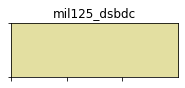

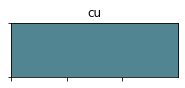

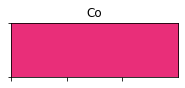

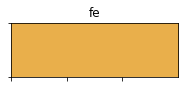

In [47]:
plot_predictions(predictions_alina, alina_names)

## Chris

In [48]:
df_chris = pd.read_csv('../data/case_studies/chris.csv')

In [49]:
predictions_chris, chris_names = predict(df_chris)

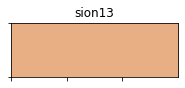

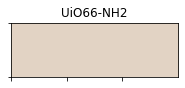

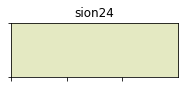

In [50]:
plot_predictions(predictions_chris, chris_names)

## Famous

In [51]:
df_famous = pd.read_csv('../data/case_studies/famous_mofs.csv')

In [52]:
predictions_famous, famous_names = predict(df_famous)

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/seaborn/miscplot.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, 1, figsize=(n * size, size))
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/seaborn/miscplot.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, 1, figsize=(n * size, size))
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/seaborn/miscplot.py:21: RuntimeWarning: More than 20 figur

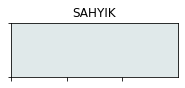

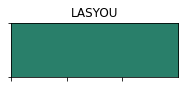

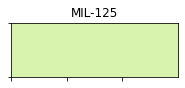

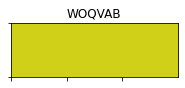

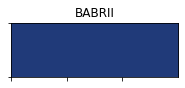

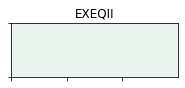

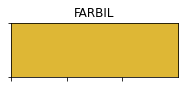

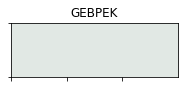

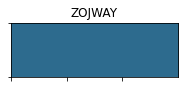

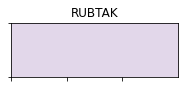

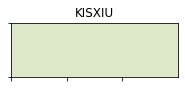

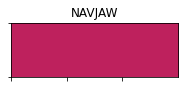

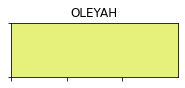

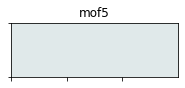

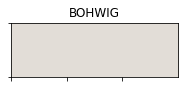

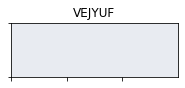

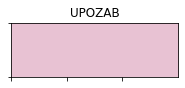

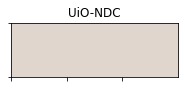

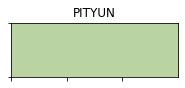

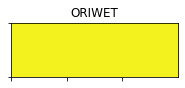

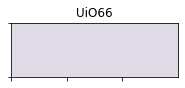

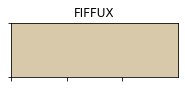

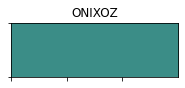

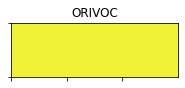

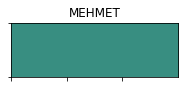

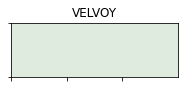

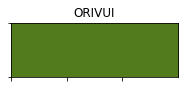

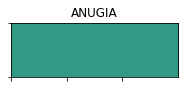

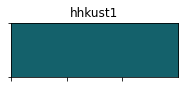

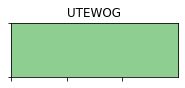

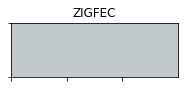

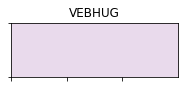

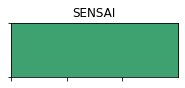

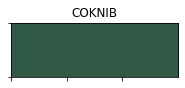

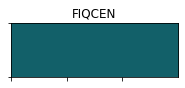

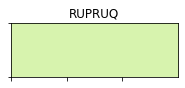

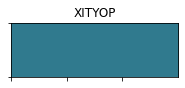

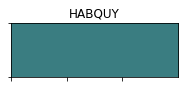

In [53]:
plot_predictions(predictions_famous, famous_names)